* Image size = 1936 x 1216
* Yolo input = 416 x 416

In [1]:
import os
import numpy as np
import csv
from PIL import Image
import sys
if('/opt/ros/kinetic/lib/python2.7/dist-packages' in sys.path):
    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2

In [2]:
def scale_image(im, bounding_boxes, wsize=416):
    w_old = im.shape[1]
    h_old = im.shape[0]
    w_new = wsize
    h_new = 0
    
    #find ratio of new height and width
    wpercent = (w_new/float(w_old))
    h_new = int((float(h_old)*float(wpercent)))
    hpercent = (h_new/float(h_old))
    
    #resize image
    resized_im = cv2.resize(im,(w_new,h_new))
    
    #resize bounding box
    new_bb = []
    for bb in bounding_boxes:
        x,y,w,h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
        x = int(x*float(wpercent))
        y = int(y*float(hpercent))
        w = int((float(w)*float(wpercent)))
        h = int((float(h)*float(hpercent)))
        new_bb.append([x,y,w,h])
    return resized_im, np.array(new_bb,dtype=bounding_boxes.dtype)

def scale_only_image(im, wsize=416):
    w_old = im.shape[1]
    h_old = im.shape[0]
    w_new = wsize
    h_new = 0
    
    #find ratio of new height and width
    wpercent = (w_new/float(w_old))
    h_new = int((float(h_old)*float(wpercent)))
    hpercent = (h_new/float(h_old))
    
    #resize image
    resized_im = cv2.resize(im,(w_new,h_new))
    
    return resized_im

def randomCrop_image(image, bounding_boxes):
    return im, bb

def zoom_image(image, bounding_boxes):
    return im, bb

# To generate and save bb for each emage

In [4]:
def make_dataset(path):
    #default "../data/"
    data = []
    for root,d_names,f_names in os.walk(path):
        for f in f_names:
            if('.png' in f):
                data.append(os.path.join(root,f))
    return data

def read_bb_annotation(csv_file):  
    with open(csv_file) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        labels = []
        for row in readCSV:
            labels.append(row)
        return np.array(labels[1:])
    
def draw_BB(image, bounding_boxes):
    objects = ["Hazelnut", "Peanut", "Walnut"]
    bbox_colors = [(0,0,255), (0,255,0), (255,0,0)]
    img = image.copy()
    for bb in bounding_boxes:
        color = bbox_colors[int(bb[4])]
        x,y,w,h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
        cv2.rectangle(img,(x,y),(x+w,y+h),color,5)
        cv2.putText(img,objects[int(bb[4])], 
        (x,y-10), 
        cv2.FONT_HERSHEY_SIMPLEX, 
        1.4,
        color,
        3)
    return img

# def draw_BB(image, bounding_boxes):
#     img = image.copy()
#     for bb in bounding_boxes:
#         x,y,w,h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
#         cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),5)
#     return img
    
dataset_path = "/media/pritesh/Entertainment/cvData/"
images = make_dataset(dataset_path)
annotation = [x.replace('image', 'label_renamed').replace(os.path.splitext(x)[-1], '.json') for x in images]
videos = [x.replace('image', 'video').replace(os.path.splitext(x)[-1], '.avi') for x in images]
labels = read_bb_annotation("/media/pritesh/Entertainment/cvData/bb_annotation.csv")

#show image and bounding box

for i, image in enumerate(images):
    im = cv2.imread(images[i])
    rows = np.where(labels==annotation[i].split('/')[-1])[0]
    bb = labels[rows,:]
    im_bb = draw_BB(im, bb[:,1:6])

    #Write image 
    img_name = images[i].split('/')[-1].split('.')[0]
    cv2.imwrite("../results/bounding box/{}_bb.png".format(img_name), im_bb)

# #display image
# while True:
#     cv2.imshow("original", im_bb)
# #     cv2.imshow("scalled", scalled_up_im)
#     k = cv2.waitKey(100)
#     if k == 27:
#         break
# cv2.destroyAllWindows()


# get list of images and labels

In [42]:
def make_dataset(path):
    #default "../data/"
    data = []
    for root,d_names,f_names in os.walk(path):
        for f in f_names:
            if('.png' in f):
                data.append(os.path.join(root,f))
    return data

def read_bb_annotation(csv_file):  
    with open(csv_file) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        labels = []
        for row in readCSV:
            labels.append(row)
        return np.array(labels[1:])
    
def draw_BB(image, bounding_boxes):
    objects = ["Hazelnut", "Peanut", "Walnut"]
    bbox_colors = [(0,0,255), (0,255,0), (255,0,0)]
    img = image.copy()
    for bb in bounding_boxes:
        print(bb)
        color = bbox_colors[int(bb[4])]
        x,y,w,h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
        cv2.rectangle(img,(x,y),(x+w,y+h),color,5)
        cv2.putText(img,objects[int(bb[4])], 
        (x,y-10), 
        cv2.FONT_HERSHEY_SIMPLEX, 
        1.4,
        color,
        3)
    return img

# def draw_BB(image, bounding_boxes):
#     img = image.copy()
#     for bb in bounding_boxes:
#         x,y,w,h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
#         cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),5)
#     return img
    
dataset_path = "/media/pritesh/Entertainment/cvData/"
images = make_dataset(dataset_path)
annotation = [x.replace('image', 'label_renamed').replace(os.path.splitext(x)[-1], '.json') for x in images]
videos = [x.replace('image', 'video').replace(os.path.splitext(x)[-1], '.avi') for x in images]
labels = read_bb_annotation("/media/pritesh/Entertainment/cvData/bb_annotation.csv")

#show image and bounding box
index = 1
im = cv2.imread(images[index])
rows = np.where(labels==annotation[index].split('/')[-1])[0]
bb = labels[rows,:]
im_bb = draw_BB(im, bb[:,1:6])
print(bb[:,:])

# #scalling down image
# resized_im, resized_bb = scale_image(im, bb[:,1:5],wsize=416)
# scalled_down_im = draw_BB(resized_im,resized_bb)

# #scalling up image to original size
# scalled_up_im, scalled_up_bb = scale_image(resized_im, resized_bb,wsize=im.shape[1])
# scalled_up_im = draw_BB(scalled_up_im,scalled_up_bb)

cv2.namedWindow("original", cv2.WINDOW_NORMAL)
# cv2.namedWindow("scalled", cv2.WINDOW_NORMAL)

#Write image 
img_name = images[index].split('/')[-1].split('.')[0]
cv2.imwrite("../results/bounding box/{}_bb.png".format(img_name), im_bb)

#display image
while True:
    cv2.imshow("original", im_bb)
#     cv2.imshow("scalled", scalled_up_im)
    k = cv2.waitKey(100)
    if k == 27:
        break
cv2.destroyAllWindows()


['498' '377' '145' '165' '2']
['880' '449' '178' '153' '2']
['985' '590' '143' '175' '2']
['1225' '637' '203' '173' '1']
['1240' '337' '103' '218' '1']
['672' '994' '216' '93' '1']
[['CV19_label_renamed_10.json' '498' '377' '145' '165' '2']
 ['CV19_label_renamed_10.json' '880' '449' '178' '153' '2']
 ['CV19_label_renamed_10.json' '985' '590' '143' '175' '2']
 ['CV19_label_renamed_10.json' '1225' '637' '203' '173' '1']
 ['CV19_label_renamed_10.json' '1240' '337' '103' '218' '1']
 ['CV19_label_renamed_10.json' '672' '994' '216' '93' '1']]


In [59]:
scalled_down = resized_im.copy()
original = im.copy()

# scalling image and bounding box

In [7]:
def scale_image(im, bounding_boxes, wsize=416):
    w_old = im.shape[1]
    h_old = im.shape[0]
    w_new = wsize
    h_new = 0
    
    #find ratio of new height and width
    wpercent = (w_new/float(w_old))
    h_new = int((float(h_old)*float(wpercent)))
    hpercent = (h_new/float(h_old))
    
    #resize image
    resized_im = cv2.resize(im,(w_new,h_new))
    
    #resize bounding box
    new_bb = []
    for bb in bounding_boxes:
        x,y,w,h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
        x = int(x*float(wpercent))
        y = int(y*float(hpercent))
        w = int((float(w)*float(wpercent)))
        h = int((float(h)*float(hpercent)))
        new_bb.append([x,y,w,h])
    return resized_im, np.array(new_bb,dtype=bounding_boxes.dtype)

w_new = 416
h_new = 0
w_old = im.shape[1]
h_old = im.shape[0]

wpercent = (w_new/float(w_old))
h_new = int((float(h_old)*float(wpercent)))
hpercent = (h_new/float(h_old))

resized_im = cv2.resize(im,(w_new,h_new))
b_box = labels[rows,:]
bounding_boxes = b_box[:,1:5]
new_bb = []
for bb in bounding_boxes:
    x,y,w,h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
    x = int(x*float(wpercent))
    
    y = int(y*float(hpercent))
    w = int((float(w)*float(wpercent)))
    h = int((float(h)*float(hpercent)))
    cv2.rectangle(resized_im,(x,y),(x+w,y+h),(0,255,0),2)
    new_bb.append([x,y,w,h])

cv2.namedWindow("original", cv2.WINDOW_NORMAL)

#display image
while True:
    cv2.imshow("original", resized_im)
    k = cv2.waitKey(100)
    if k == 27:
        break
cv2.destroyAllWindows()

# Scale up to original size image

In [4]:
def scaleup_image(im, bounding_boxes, wsize=1936):
    w_old = im.shape[1]
    h_old = im.shape[0]
    w_new = wsize
    h_new = 0
    
    #find ratio of new height and width
    wpercent = (w_new/float(w_old))
    h_new = int((float(h_old)*float(wpercent)))
    hpercent = (h_new/float(h_old))
    
    #resize image
    resized_im = cv2.resize(im,(w_new,h_new))
    
    #resize bounding box
    new_bb = []
    for bb in bounding_boxes:
        x,y,w,h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
        x = int(x*float(wpercent))
        y = int(y*float(hpercent))
        w = int((float(w)*float(wpercent)))
        h = int((float(h)*float(hpercent)))
        new_bb.append([x,y,w,h])
    return resized_im, np.array(new_bb,dtype=bounding_boxes.dtype)

im = scalled_down.copy()
print(im.shape)
w_new = 1936
h_new = 0
w_old = im.shape[1]
h_old = im.shape[0]

wpercent = (w_new/float(w_old))
h_new = int((float(h_old)*float(wpercent)))
hpercent = (h_new/float(h_old))

resized_im = cv2.resize(im,(w_new,h_new))
bounding_boxes = resized_bb.copy()
new_bb = []
for bb in bounding_boxes:
    x,y,w,h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
    x = int(x*float(wpercent))
    y = int(y*float(hpercent))
    w = int((float(w)*float(wpercent)))
    h = int((float(h)*float(hpercent)))
    cv2.rectangle(resized_im,(x,y),(x+w,y+h),(0,255,0),2)
    new_bb.append([x,y,w,h])

cv2.namedWindow("original", cv2.WINDOW_NORMAL)

#display image
while True:
    cv2.imshow("original", resized_im)
    k = cv2.waitKey(100)
    if k == 27:
        break
cv2.destroyAllWindows()

NameError: name 'scalled_down' is not defined

In [19]:
np.array(new_bb,dtype="U27")

array([['140', '33', '21', '44'],
       ['50', '36', '52', '25'],
       ['160', '135', '18', '16'],
       ['190', '200', '14', '17'],
       ['129', '143', '40', '31'],
       ['244', '186', '40', '33'],
       ['163', '33', '30', '38']], dtype='<U27')

In [20]:
bounding_boxes.dtype

dtype('<U27')

In [54]:
resized_im.shape

(1210, 1936, 3)

In [10]:
scalled_down_im.shape

(261, 416, 3)

In [46]:
bounding_boxes

array([['140', '33', '21', '44'],
       ['50', '36', '52', '25'],
       ['160', '135', '18', '16'],
       ['190', '200', '14', '17'],
       ['129', '143', '40', '31'],
       ['244', '186', '40', '33'],
       ['163', '33', '30', '38']], dtype='<U27')

In [71]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap(name="winter")

In [77]:
cmap(3)

(0.0, 0.011764705882352941, 0.9941176470588236, 1.0)

In [81]:
im = cv2.imread("/media/pritesh/Entertainment/yolo/PyTorch-YOLOv3/data/samples/CV19_image_1.png")
im = cv2.resize(im,(416, 261))
cv2.imwrite("nuts.jpg", im)

True

In [84]:
im.shape[1]

416

In [89]:
float(bb[0][4])

209.0

In [9]:
im.shape

(1216, 1936, 3)

(416, 416, 3)

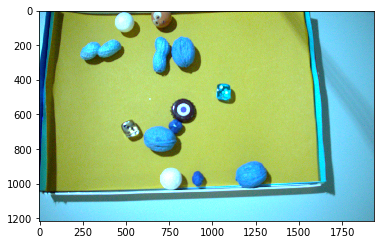

In [25]:
import matplotlib.pyplot as plt
plt.imshow(im)

r_im = cv2.resize(im,(416,416))
r_im.shape

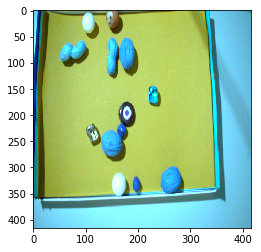

In [26]:
plt.imshow(r_im)

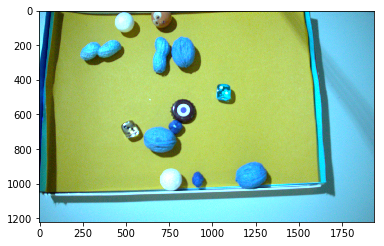

In [29]:
u_im = cv2.resize(im,(1936,1216))
plt.imshow(u_im)

In [31]:
a  = im.shape

In [32]:
a[0]

1216

In [34]:
import torch

In [60]:
a = torch.randn(1)
a

tensor([1.2175])

In [43]:
int(a[:, 0]*float(0.5))

ValueError: only one element tensors can be converted to Python scalars

In [46]:
for i,an in enumerate(a):
    print(i,an)

0 tensor([0.1918, 0.2783, 0.3499, 0.0752, 0.0900, 0.5557, 0.3898])
1 tensor([0.0317, 0.7142, 0.3553, 0.5859, 0.0161, 0.6825, 0.4716])
2 tensor([0.8202, 0.4688, 0.4587, 0.6861, 0.5907, 0.9835, 0.3516])
3 tensor([0.2613, 0.1697, 0.4281, 0.2260, 0.8393, 0.8194, 0.2127])
4 tensor([0.5955, 0.2167, 0.4306, 0.9167, 0.1351, 0.0050, 0.8382])


In [62]:
int(a)

1